#### Importing required libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing the data using read_csv function

In [3]:
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.shape

(2200, 8)

#### Ensuring data quality, checking null values

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### Following labels or crops can be predicted from given information

In [7]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Data Distribution

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

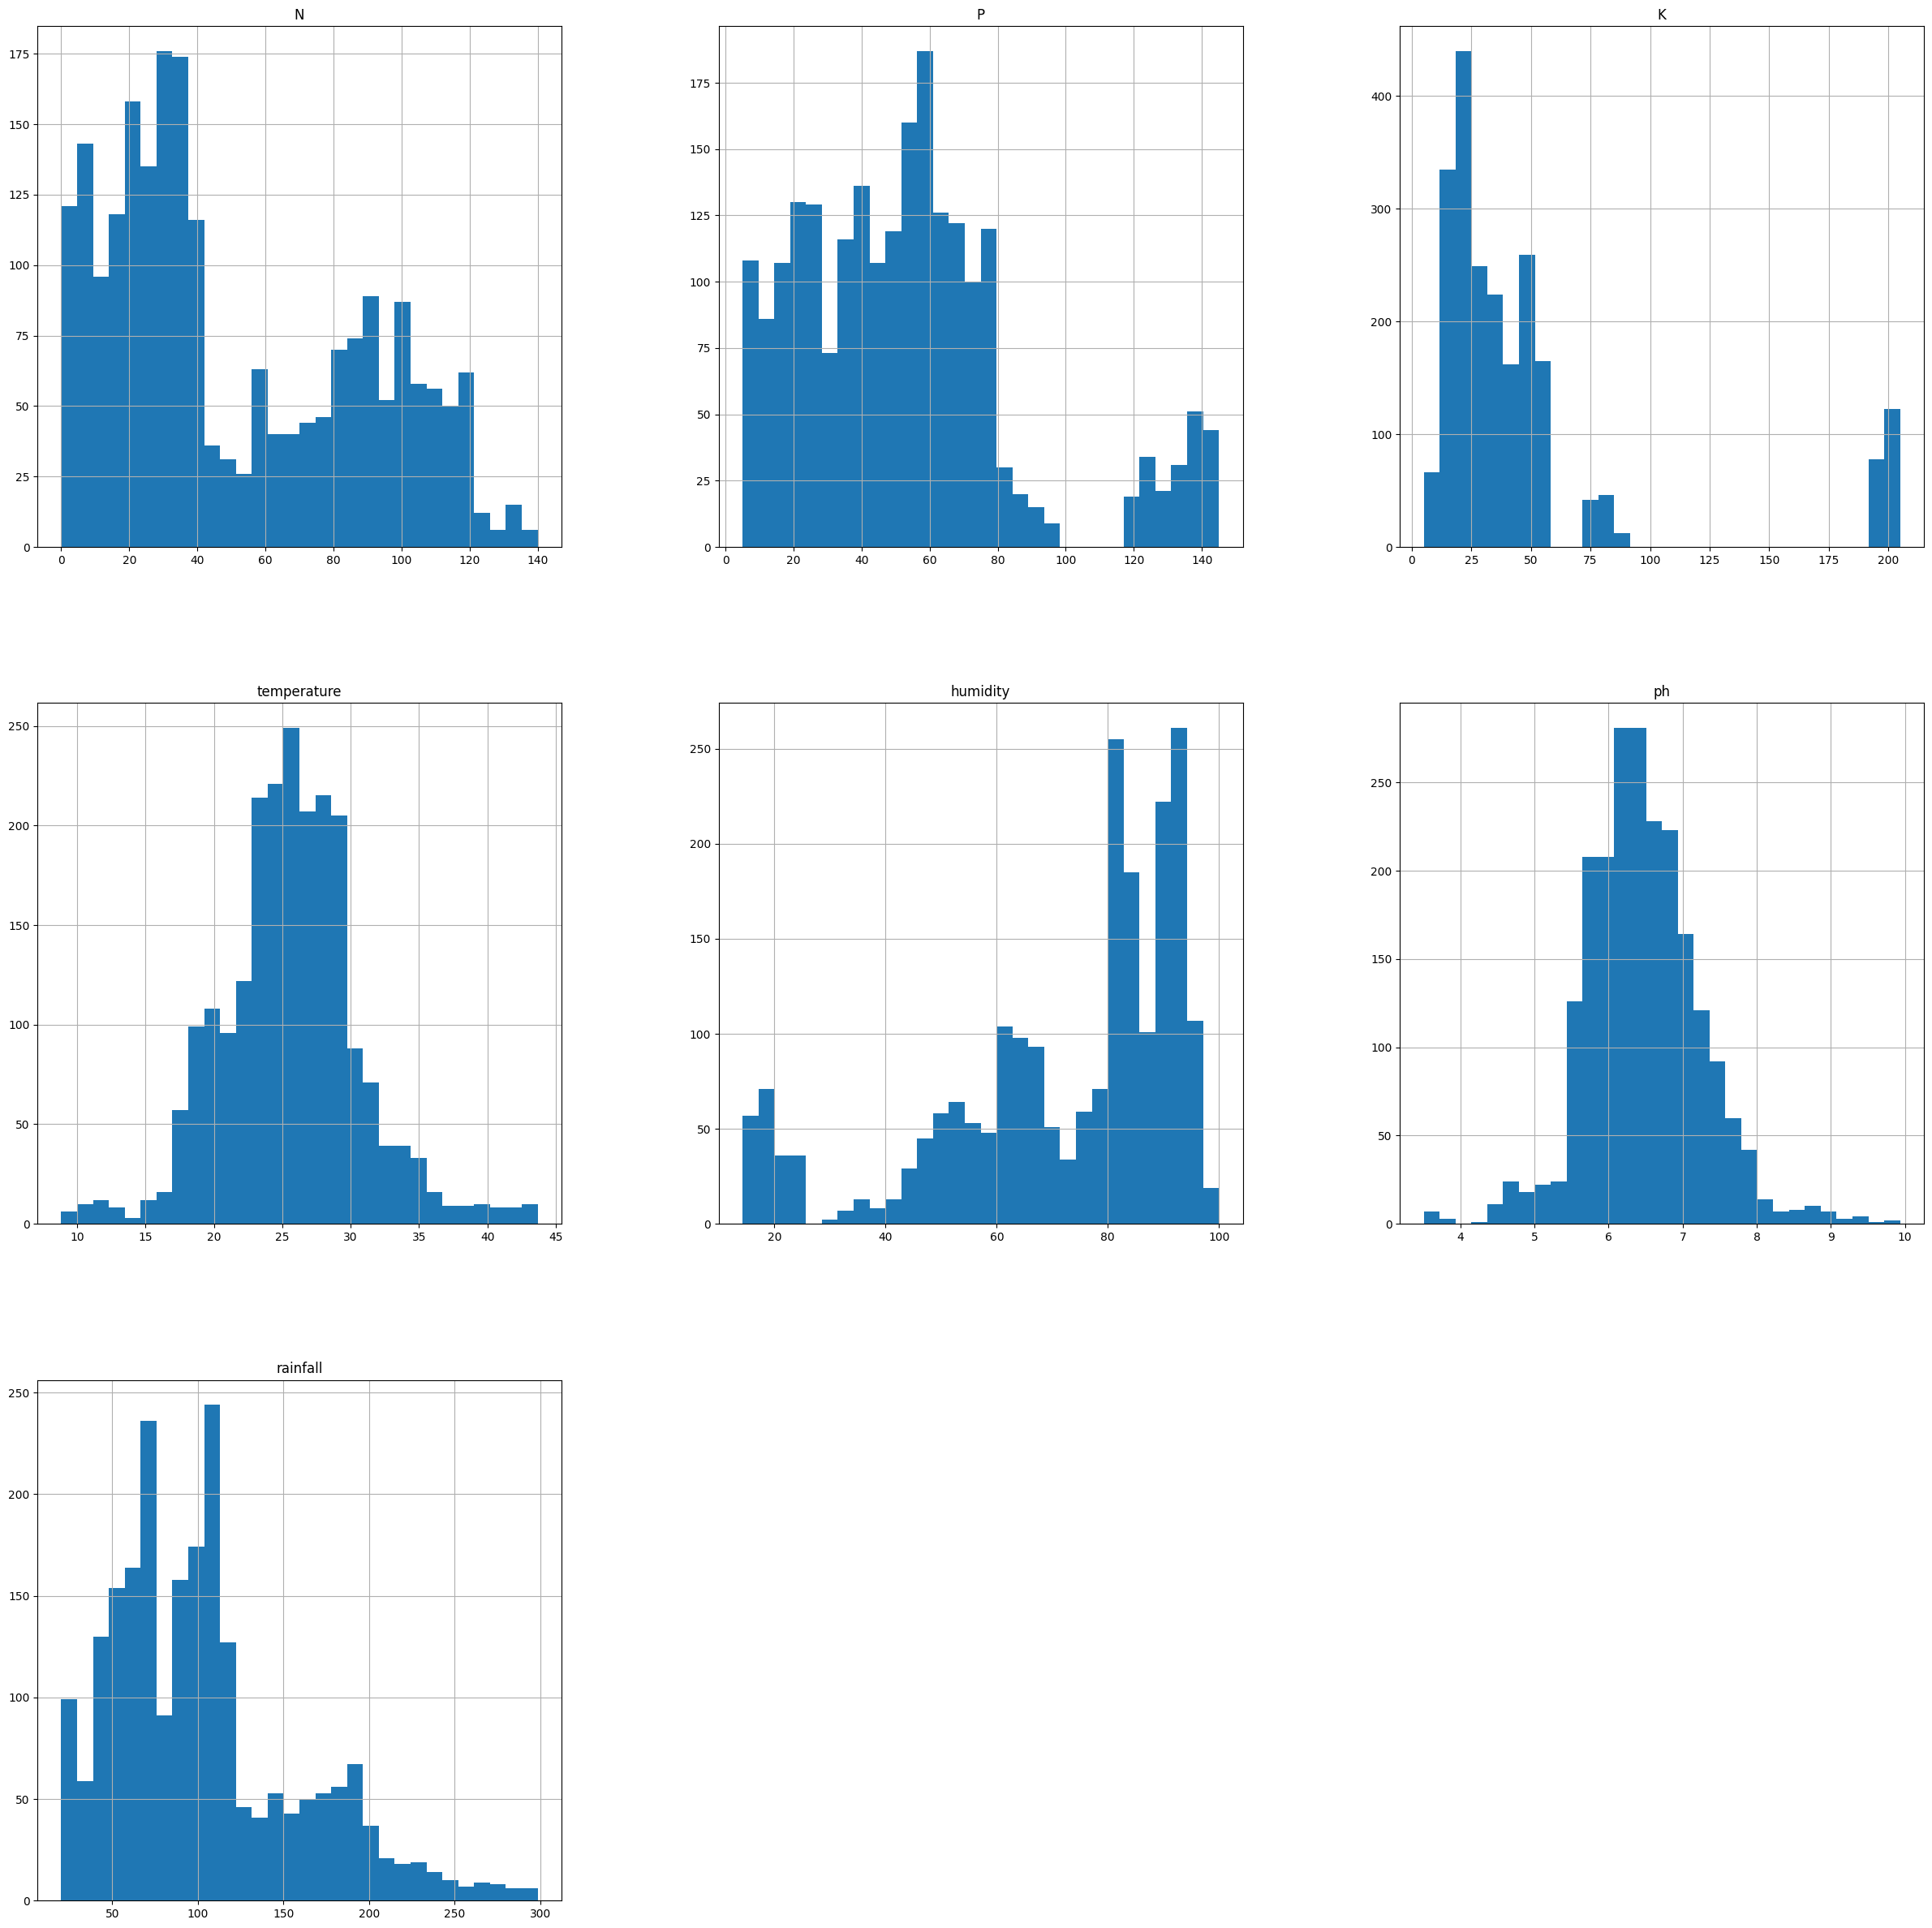

In [11]:
data.hist(bins = 30, figsize=(30, 30))

#### Using sklearn train test split

In [12]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_train.value_counts()

label
lentil         89
orange         86
grapes         86
muskmelon      83
cotton         83
coffee         83
mango          81
mungbean       81
watermelon     81
rice           81
kidneybeans    80
blackgram      80
banana         79
maize          79
pigeonpeas     77
papaya         77
jute           77
pomegranate    77
apple          77
mothbeans      76
chickpea       74
coconut        73
Name: count, dtype: int64

#### Using RandomForestClassifier for model creation

In [15]:
model = RandomForestClassifier()

In [16]:
# Training the model on train data
model.fit(X_train, y_train)

RandomForestClassifier()

#### Making predictions

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

In [19]:
accuracy = model.score(X_test, y_test)
accuracy

0.9931818181818182

#### Predictin for new data point


In [23]:
new_feature = [[117 ,32,34,26.2724184,52.12739421,6.758792552,127.1752928,]]
predicted_crop = model.predict(new_feature)
print("Predicted Crop: ", predicted_crop)

Predicted Crop:  ['coffee']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Saving model with Pickle Library

In [24]:
import pickle

#### Dump method of pickle library is used to serialize (convert to byte stream) and save an object (ML Model) to the file

In [25]:
# Model will be saved with name 'model.pkl' in write-binary (wb) mode
pickle.dump(model, open("model.pkl", "wb"))